# NumPy
Nunca produzimos tantos dados. Nossa capacidade de tratar essa avalanche de conteúdo para transformá-la em informação útil requer sofisticados procedimentos de análise, impossíveis de implementar sem o apoio de ferramentas computacionais. Neste curso, mostraremos como carregar, armazenar e manipular estruturas de dados em Python.

Embora seja um assunto complexo, pois os dados podem assumir diferentes formatos (ex. coleção de documentos, imagens, sons, números, etc), vamos pensar em todos os dados como sendo arrays de números. Por exemplo, imagens podem ser pensadas como arrays bi-dimensionais de números, que representam os pixels. Sons, como um array unidimensional de intensidade versus tempo. Texto podem ser convertidas em várias formatos de representação numérica. Em resumo, *não importa qual seja o dado, o primeiro passo para torná-lo analisável é transformá-lo em array numérico*.

Assumindo esse cenário, para o nosso estudo de análise de dados, mostraremos como armazenar e manipular arrays numéricos de forma eficiente através da biblioteca *NumPy*, que é a *base para quase todo o ferramental de análise de dados em Python*. 

## NumPy vs List

Uma lista em Python é capaz de armazenar objetos de diferentes tipos, como mostrado no exemplo a seguir:

Embora possua estrutura similar a uma lista aninhada, *NumPy possui mecanismos bem mais eficientes para armazenamento e processamento de grandes volumes de dados*. 



In [164]:
lista = [2, 'Texto', True,  4.0]
[type(item) for item in lista]

[int, str, bool, float]

Infelizmente, para oferecer essa flexibilidade, cada item da lista é um objeto completo, armazenando um conjunto de informações sobre tipo. Isso torna a estrutura bastante "pesada" e sua manipulação fica cara, tanto em termos de espaço de memória quanto em tempo de processamento.

Por outro lado, se removermos essa flexibilidade, fazendo com que todas as variáveis da lista possuam o mesmo tipo, muitas das informações armazenadas tornam-se redundantes, possibilitando reduzir substancialmente o espaço de memória e o tempo de processamento. É justamente isso que NumPy faz ao armazenar os dados em uma *matriz com tipo fixo*.

Portanto, se observarmos a implementação de um array NumPy, veremos um vetor contendo ponteiros para regiões contíguas de dados. Por outro lado uma list contém um vetor de ponteiros para blocos de ponteiros. Cada ponteiro no bloco referencia um objeto Python completo.

Em resumo: 

| Estrutura de Dado | Eficiência | Flexibilidade |
|------------------:|:----------:|:-------------:|
| list              | baixa      | alta          | 
| NumPy             | alta       | baixa         |


## Introdução a Arrays NumPy

Desde sua versão 3.3, a linguagem Python disponibiliza uma forma nativa de arrays. O exemplo a seguir cria um array. 'i' indica que os dados são do tipo inteiro. 

In [165]:
import array
lista = list(range(5))
array = array.array('i', lista)
array

array('i', [0, 1, 2, 3, 4])

O array nativo armazene dados de maneira eficiente. O `ndarray` de NumPy disponibiliza um conjunto de operações para operar tais arrays de forma bastante eficiente. 

### Criando Arrays a partir de Lists
    
O primeiro passo para trabalhar com NumPy é importar a biblioteca. Faremos isso com o seguinte comando, que também atribui o apelido `np` para a biblioteca.

In [2]:
import numpy as np

Criando um array:

In [167]:
array1 = np.array(range(1,6)) 
array1

array([1, 2, 3, 4, 5])

Criando um array de inteiros a partir de uma lista:

In [168]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

Como uma lista pode ter valores de diferentes tipos, mas arrays NumPy só admitem valores do mesmo tipo, se os tipos forem diferentes, NumPy realiza o `upcast` (transformar o tipo mais restrito em um tipo mais amplo; ex: inteiro para real), quando possível:

In [169]:
# upcast de inteiro para real
np.array([1, 2.2, 3, 4.4, 5])

array([1. , 2.2, 3. , 4.4, 5. ])

Alternativamente, pode-se forçar o tipo do array:

In [170]:
# transforma todos os dados em inteiro com 64 bits
array_int = np.array([1.1, 2.2, 3.3, 4.4, 5.5],'int64')
array_int

array([1, 2, 3, 4, 5], dtype=int64)

In [171]:
# transforma todos os dados em ponto flutuante com 32 bits
array_float = np.array(list(range(5)),'float32')
array_float

array([0., 1., 2., 3., 4.], dtype=float32)

A seguinte tabela apresenta a lista de tipos aceitos por Python:

| Data | type Description | 
|:-----|:-----------------|
| bool_ | Boolean (True or False) stored as a byte | 
| int_ | Default integer type (same as C long; normally either int64 or int32) | 
| intc | Identical to C int (normally int32 or int64) |
| intp | Integer used for indexing (same as C ssize_t; normally either int32 or int64) |
| int8 | Byte (–128 to 127) |
| int16 | Integer (–32768 to 32767) |
| int32 | Integer (–2147483648 to 2147483647) |
| int64 | Integer (–9223372036854775808 to 9223372036854775807) |
| uint8 | Unsigned integer (0 to 255) |
| uint16 | Unsigned integer (0 to 65535) |
| uint32 | Unsigned integer (0 to 4294967295) |
| uint64 | Unsigned integer (0 to 18446744073709551615) |
| float_ | Shorthand for float64 |
| float16 | Half-precision float: sign bit, 5 bits exponent, 10 bits mantissa |
| float32 | Single-precision float: sign bit, 8 bits exponent, 23 bits mantissa |
| float64 | Double-precision float: sign bit, 11 bits exponent, 52 bits mantissa |
| complex_ | Shorthand for complex128 |
| complex64 | Complex number, represented by two 32-bit floats |
| complex128 | Complex number, represented by two 64-bit floats |


### Arrays Multidimensionais

Pode-se utilizar listas aninhadas para criar arrays multidimensionais. As listas mais internas tornam-se linhas e a lista mais externa forma as colunas.

In [172]:
# array 2-dimensões a partir de listas aninhadas
array_lista_aninhada = np.array([list(range(1,6)), list(range(6,11))]) 
array_lista_aninhada

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

Outra forma para criar a mesma lista:

In [20]:
# array 2-dimensões a partir de listas aninhadas
array_lista_aninhada = np.array([range(i, i+5) for i in [1, 6]]) 
array_lista_aninhada

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

Alguns *atributos* do array são bastante úteis:

In [21]:
print(array_lista_aninhada)
print('array_lista_aninhada ndim:  ', array_lista_aninhada.ndim)
print('array_lista_aninhada shape: ', array_lista_aninhada.shape, '-> (2 lin, 5 col)')
print('array_lista_aninhada size:  ', array_lista_aninhada.size)
print('array_lista_aninhada dtype: ', array_lista_aninhada.dtype)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
array_lista_aninhada ndim:   2
array_lista_aninhada shape:  (2, 5) -> (2 lin, 5 col)
array_lista_aninhada size:   10
array_lista_aninhada dtype:  int32


O método `reshape` é útil para modificar o formato do array:

In [22]:
novo_array = array_lista_aninhada.reshape((5,2))
novo_array

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [176]:
# array 3-dimensões a partir de listas aninhadas
array_lista_aninhada = np.array([np.array([list(range(1,  3)), list(range(4, 6)),  list(range(7,   9))]),
                                 np.array([list(range(10,12)), list(range(13,15)), list(range(16, 18))])])
print(array_lista_aninhada)
print('array_lista_aninhada ndim:  ', array_lista_aninhada.ndim)
print('array_lista_aninhada shape: ', array_lista_aninhada.shape, '-> (2 lin-ext, 3 lin-int, 2 col-int)')
print('array_lista_aninhada size:  ', array_lista_aninhada.size)
print('array_lista_aninhada dtype: ', array_lista_aninhada.dtype)

[[[ 1  2]
  [ 4  5]
  [ 7  8]]

 [[10 11]
  [13 14]
  [16 17]]]
array_lista_aninhada ndim:   3
array_lista_aninhada shape:  (2, 3, 2) -> (2 lin-ext, 3 lin-int, 2 col-int)
array_lista_aninhada size:   12
array_lista_aninhada dtype:  int32


### Concatenando Arrays

O método `concatenate(tupla, axis=0)` é empregado para concatenar arrays, que possuem a mesma quantidade de dimensões e a mesma quantidade de colunas.

In [68]:
# array bi-dimensional com uma linha
array1 = np.array([[1, 2, 3]])
# array bi-dimensional com duas linha3
array2 = np.array([[4, 5, 6], [7, 8, 9]])
# concatenando array1 e array2
array3 = np.concatenate([array1, array2],axis=0)
print('array3:\n',array3)


array3:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


O método `concatenate(tupla, axis=1)` é empregado para concatenar arrays, que possuem a mesma quantidade de dimensões e a mesma quantidade de linhas.

In [70]:
# array 2x1 
array1 = np.array([[1], 
                   [2]])
# array 2x3
array2 = np.array([[4, 5, 6], [7, 8, 9]])
# concatenando array1 e array2
array3 = np.concatenate([array1, array2],axis=1)
print('array3:\n',array3)

array3:
 [[1 4 5 6]
 [2 7 8 9]]


### Dividindo Arrays

O método `splip(array, ponto de divisão, axis=0)` é empregado para dividir as linhas de um array:

In [96]:
array0 = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8]])
acima, abaixo = np.split(array0, [1], axis=0)
print('array0:\n',array0)
print('acima:\n', acima)
print('abaixo:\n', abaixo)

array0:
 [[1 2 3]
 [3 4 5]
 [6 7 8]]
acima:
 [[1 2 3]]
abaixo:
 [[3 4 5]
 [6 7 8]]


O método `splip(array, ponto de divisão, axis=1)` é empregado para dividir as colunas de um array:

In [99]:
array0 = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8]])
esquerda, direita = np.split(array0, [1], axis=1)
print('array0:\n',array0)
print('esquerda:\n', esquerda)
print('direita:\n', direita)

array0:
 [[1 2 3]
 [3 4 5]
 [6 7 8]]
esquerda:
 [[1]
 [3]
 [6]]
direita:
 [[2 3]
 [4 5]
 [7 8]]


### Rotinas para criação e incialização de arrays

Existem diversas rotinas para criar e inicializar arrays, que são muito úteis para arrays muito grandes.

In [71]:
# cria array de inteiros, inicializado com zero
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

In [178]:
# cria a 2x3 de reais, inicializando com um
np.ones((2, 3), dtype=float)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [179]:
# cria um array 2x3, inicializando com o número pi (3.14)
np.full((2, 3), 3.14)

array([[3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14]])

In [180]:
# cria array com sequência iniciando em 0 e terminando em 31, com incremento de 5
np.arange(0, 31, 5)

array([ 0,  5, 10, 15, 20, 25, 30])

In [181]:
# cria array (2,3) com valores randômicos
np.random.random((2, 3))

array([[0.69359553, 0.61705898, 0.15167913],
       [0.66719534, 0.33110937, 0.31254565]])

In [182]:
# cria array (2,3) com valores inteiros randômicos entre 0 e 10
np.random.randint(0,10,(2, 3))

array([[7, 0, 4],
       [4, 4, 1]])

### Acessando Elementos do Array

Em arrays unidimensionais, utiliza-se a mesma notação de listas, com índice iniciando em zero.

In [138]:
# array unidimensional
array1 = np.array(range(1,6)) 
array1

array([1, 2, 3, 4, 5])

In [125]:
array1[0]

1

In [183]:
array1[2]

3

Também aceita índices negativos:

In [185]:
# 2o elemento do fim para o início
array1[-2]

4

Acessando partes do array:

In [186]:
# até o 2o elemento
array1[:2]

array([1, 2])

In [187]:
# tudo depois do 2o elemento 
array1[2:]

array([3, 4, 5])

In [188]:
# depois 2o elemento até o 4o elemento
array1[2:4]

array([3, 4])

In [189]:
# tudo, a partir do 1o elemento, pulando de 2 em 2
array1[::2]

array([1, 3, 5])

In [191]:
# tudo, depois do 2o elemento pulando de 2 em 2
array1[2::]

array([3, 4, 5])

In [192]:
# tudo, depois do 2o elemento pulando de 2 em 2
array1[2::2]

array([3, 5])

Para arrays multidimensionais, utiliza-se tuplas como índice:

In [31]:
# array 2-dimensões 
array2 = np.array([list(range(1,5)), list(range(6,10)), list(range(11,15))]) 
print(array2)
# segunda 2a linha, 3a coluna
print(array2[1,2])

SyntaxError: invalid syntax (<ipython-input-31-5f499e7ae2ce>, line 6)

In [194]:
# até a 2a linha e até a 3a coluna 
array2[:2, :3]

array([[1, 2, 3],
       [6, 7, 8]])

In [195]:
# até a 3a linha, a partir da 1a coluna, pulando de duas em duas
array2[:3, ::2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13]])

Uma operação muito comum quando se trabalha com matriz é o acesso a uma coluna inteira ou uma linha inteira. Isso pode ser feito combinando um indexador escalar com o símbolo `:`, que acessa toda linha ou coluna.

In [196]:
# acessando toda 2a linha
array2[1, :]

array([6, 7, 8, 9])

In [197]:
# acessando toda 2a coluna
array2[:, 1]

array([ 2,  7, 12])

É possível modificar diretamente os valores de um array:

In [198]:
# array unidimensional
array1 = np.array(range(1,6)) 
print('array1:', array1)
array1[2] = 7
print('array1:', array1)

array1: [1 2 3 4 5]
array1: [1 2 7 4 5]


**Atenção:** como NumPy só aceita arrays com tipo fixo, caso você tente inserir, por exemplo, um valor real em um array de inteiros, esse valor será truncado sem que você seja avisado sobre isso.

In [200]:
# array unidimensional
array1 = np.array(range(1,6)) 
print('array1:', array1)
array1[2] = 7.22
print('array1:', array1)

array1: [1 2 3 4 5]
array1: [1 2 7 4 5]


### Subarrays são visões, não cópias

Diferente do que acontece com as listas, quando selecionamos um subarray, estamos criando uma visão do array e não uma cópia de parte do array. Isso é feito para tornar as operações mais eficientes. Veja o exemplo abaixo:

In [5]:
# array 2-dimensões 
array2 = np.array([list(range(1,5)), list(range(6,10)), list(range(11,15))]) 
print('array2:\n',array2)
sub_array2 = array2[:2, :3]
print('sub_array2:\n', sub_array2)
sub_array2[0, 0] = -1
print('sub_array2:\n', sub_array2)
print('array2:\n',array2)

array2:
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]
sub_array2:
 [[1 2 3]
 [6 7 8]]
sub_array2:
 [[-1  2  3]
 [ 6  7  8]]
array2:
 [[-1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


Porém, caso deseje criar uma cópia do array, isso pode ser feito com o método `copy`:

In [157]:
# array 2-dimensões 
array2 = np.array([list(range(1,5)), list(range(6,10)), list(range(11,15))]) 
print('array2:\n',array2)
# criando uma cópia do array
sub_array2 = array2[:2, :3].copy()
print('sub_array2:\n', sub_array2)
sub_array2[0, 0] = -1
print('sub_array2:\n', sub_array2)
print('array2:\n',array2)

array2:
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]
sub_array2:
 [[1 2 3]
 [6 7 8]]
sub_array2:
 [[-1  2  3]
 [ 6  7  8]]
array2:
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


## Operando com Arrays NumPy (Funções Universais - UFuncs)

Operações com array NumPy podem ser computadas de forma bem mais eficientes utilizando *operadores vetorizados* do que através de loops for. Esses operadores são implementados através das chamadas funções universais (*UFuncs*). 

Operações vetorizadas podem ocorrer entre um valor escalar e um array ou entre dois arrays:

In [151]:
a1 = np.array(range(5))
print('a1:\n',a1,'\n')
print('2 * a1:\n', 2 * a1,'\n')
print('(2 * a1) + 1:\n', (2 * a1) + 1,'\n')
print('2 ** a1:\n', 2 ** a1,'\n')

a1:
 [0 1 2 3 4] 

2 * a1:
 [0 2 4 6 8] 

(2 * a1) + 1:
 [1 3 5 7 9] 

2 ** a1:
 [ 1  2  4  8 16] 



In [121]:
print('a1:\n',a1,'\n')
a2 = np.arange(0, 10).reshape((2,5))
print('a2:\n',a2,'\n')
print('a1 * a2:\n', a1 * a2,'\n')

a1:
 [0 1 2 3 4] 

a2:
 [[0 1 2 3 4]
 [5 6 7 8 9]] 

a1 * a2:
 [[ 0  1  4  9 16]
 [ 0  6 14 24 36]] 



In [ ]:
a1 = np.arange(5)
print('a1:\n',a1,'\n')
a2 = np.zeros(15)
print('a2:\n',a2,'\n')
# calcula 2 elevado a a1 e armazena em a2
# avançando as posições de a2 de 3 em 3
a2[::3] = np.power(2, a1)
print(a2)

### Aggregates Functions

Trata-se de uma família de funções que analisam e processam uma estrutura de dados e combina os resultados parciais para criar um valor de retorno. Um exemplo muito útil é o método `reduce`, que aplica uma determinada operação repetidamente aos elementos de um array até reduzir o conteúdo a um único valor. Por exemplo, ao aplicar reduce para a UFunc `add`, obtém-se como resultado a soma de todos os elementos do array:

In [176]:
a1 = np.array(list(range(5)))
soma_a1 = np.add.reduce(a1)
print('a1:',a1)
print('soma_a1:',soma_a1)

a1: [0 1 2 3 4]
soma_a1: 0


Para calcular o resultado cumulativamente, utiliza-se `accumulate`:

In [172]:
a1 = np.array(list(range(5)))
soma_a1 = np.add.accumulate(a1)
print('a1:',a1)
print('soma_cumulativa_a1:',soma_a1)

a1: [0 1 2 3 4]
soma_cumulativa_a1: [ 0  1  3  6 10]


NumPy oferece um conjunto de funções para computar agregações: 

`np.sum` é equivalente a `np.add.reduce`

`np.prod ` é equivalente a `np.multiply.reduce`

`np.cumsum` é equivalente a `np.add.accumulate`

`np.cumprod` é equivalente a `np.multiply.accumulate`

A tabela abaixo apresenta a lista completa de funções:

| Function Name | NaN-safe Version | Description |
|:--------------|:-----------------|:------------|
| np.sum | np.nansum | Compute sum of elements
| np.prod | np.nanprod | Compute product of elements
| np.mean | np.nanmean | Compute median of elements
| np.std | np.nanstd | Compute standard deviation
| np.var | np.nanvar | Compute variance
| np.min | np.nanmin | Find minimum value
| np.max | np.nanmax | Find maximum value
| np.argmin | np.nanargmin | Find index of minimum value
| np.argmax | np.nanargmax | Find index of maximum value
| np.median | np.nanmedian | Compute median of elements
| np.percentile | np.nanpercentile | Compute rank-based statistics of elements
| np.any | N/A | Evaluate whether any elements are true
| np.all | N/A | Evaluate whether all elements are true

As funções de agregação também funciona para arrays bi-dimensionais. Se quisermos aplicar parauma linha ou coluna específica de uma matriz bi-dimensional, é necessário controlar através do parâmetro `axis`:

In [197]:
a1 = np.array([list(range(4)), list(range(6,10))])
# soma todos os elementos de a1
sum_total_a1 = np.sum(a1)
# soma todos os elementos em cada linha de a1
sum_linha_a1 = np.sum(a1,  axis=1)
# soma todos os elementos em cada coluna de a1
sum_coluna_a1 = np.sum(a1, axis=0)
print('array a1:\n', a1)
print('\nsoma de todos valores de a1:\n', sum_total_a1)
print('\nsoma das linhas de a1 (axis=1):\n', sum_linha_a1)
print('\nsoma das colunas de a1 (axis=1):\n', sum_coluna_a1)

array a1:
 [[0 1 2 3]
 [6 7 8 9]]

soma de todos valores de a1:
 36

soma das linhas de a1 (axis=1):
 [ 6 30]

soma das colunas de a1 (axis=1):
 [ 6  8 10 12]


### Broadcasting

Utiliza-se *broadcasting* para realizar operações vetorizadas em arrays de tamanhos diferentes. Para esses casos, NumPy "estica" a dimensão de menor tamanho de cada array para que ambos possuam o mesmo tamanho. Os arrays podem então ser operados, após esse alinhamento de tamanhos.

#### Regra 1
Se os dois arrays diferem no número de dimensões, o array com menor dimensão é "esticado" para obter o formato do array de maior tamanho. Isso é feito, preenchendo a dimensão faltante com tamanho 1 no lado esquerdo da tupla.

##### Exemplo 1



In [5]:
a1 = np.array([[1, 2, 3],[1,2,3]])
a2 = np.array([4, 4, 4])
soma = a1 + a2
print('Dimensões diferentes:\n')
print('array a1 dim:', a1.ndim)
print('array a1 shape:', a1.shape)
print('array a1:', a1)
print('\narray a2 dim:', a2.ndim)
print('array a2 shape:', a2.shape)
print('array a2:', a2)

Dimensões diferentes:

array a1 dim: 2
array a1 shape: (2, 3)
array a1: [[1 2 3]
 [1 2 3]]

array a2 dim: 1
array a2 shape: (3,)
array a2: [4 4 4]


Aplicação da Regra 1:

<img  src="./imagens/09-broadcasting.png" width="500" />

De acordo com a *Regra 1*, como *a1* tem dimensão 2 e *a2* tem dimensão 1, devemos incluir uma dimensão a mais em *a2*, acrescentando uma dimensão de tamanho 1 do lado esquerdo da tupla. Portanto, *a2* passará a ter dimensão 2 com shape (1,3).

#### Regra 2
Se os dois arrays possuem o mesmo número de dimensões, mas as formas não batem em alguma dimensão, deve-se "esticar" o array que tenha tamanho igual a 1 na dimensão que é incompatível para se alinhar com a maior dimensão. 

**Obs:** é possível que nenhum dos dois arrays tenha tamanho 1 na dimensão incompatível. Veremos esse caso na *Regra 3*.

Com base na *Regra 2*, a primeira dimensão de *a2* (linha) será esticada para se alinhar com a primeira dimensão de *a1*, que tem tamanho 3. Portanto, a nova dimensão de *a2* será (2, 3).

Aplicação da Regra 2:

<img  src="./imagens/09-broadcasting1.png" width="500" />

Agora, com os dois arrays possuindo o mesmo tamanho e formato, podemos realizar a operação de soma.

In [61]:
print('a1 + a2:\n', a1 + a2)

a1 + a2:
 [[5 6 7]
 [5 6 7]]


##### Exemplo 2

In [8]:
a1 = np.array([[1], [1], [1]] )
a2 = np.array([4, 4, 4])
soma = a1 + a2
print('Dimensões diferentes:\n')
print('array a1 dim:', a1.ndim)
print('array a1 shape:', a1.shape)
print('array a1:\n', a1)
print('\narray a2 dim:', a2.ndim)
print('array a2 shape:', a2.shape)
print('array a2:', a2)

Dimensões iguais:

array a1 dim: 2
array a1 shape: (3, 1)
array a1:
 [[1]
 [1]
 [1]]

array a2 dim: 1
array a2 shape: (3,)
array a2: [4 4 4]


Aplicação da Regra 1:

<img  src="./imagens/09-broadcasting2.png" width="500" />


Aplicação da Regra 2:

<img  src="./imagens/09-broadcasting3.png" width="500" />

In [9]:
print('\na1 + a2:\n', soma)


a1 + a2:
 [[5 5 5]
 [5 5 5]
 [5 5 5]]


#### Exemplo 3

In [3]:
a1 = np.array([[1, 1], [1, 1], [1, 1]] )
a2 = np.array([4, 4, 4])
print('Dimensões diferentes:\n')
print('array a1 dim:', a1.ndim)
print('array a1 shape:', a1.shape)
print('array a1:\n', a1)
print('\narray a2 dim:', a2.ndim)
print('array a2 shape:', a2.shape)
print('array a2:', a2)

Dimensões diferentes:

array a1 dim: 2
array a1 shape: (3, 2)
array a1:
 [[1 1]
 [1 1]
 [1 1]]

array a2 dim: 1
array a2 shape: (3,)
array a2: [4 4 4]


Aplicando a Regra 1:

<img  src="./imagens/09-broadcasting4.png" width="500" />

Neste ponto, aplicaremos a Regra 2 para alinhar o tamanho da dimensão linha:


<img  src="./imagens/09-broadcasting5.png" width="700" />

O problema acima nos leva à *Regra 3*.

#### Regra 3
Caso nenhum dos arrays possua tamanho igual a 1 na dimensão que não é compatível, não será possível realizar o broadcasting e obtém-se um erro.


### Máscaras Booleanas

Quando queremos extrair, modificar, contar ou manipular valores em uma matriz com base em algum critério, podemos utilizar as *máscaras booleanas*. Exemplos de critérios seria: contar todas as notas maiores ou iguais a 7 ou a remover todos os valores abaixo de um limite.

Para exemplificar, vamos avaliar as médias obtidas por 3 turmas de alunos de programação, cada turma com 50 alunos.

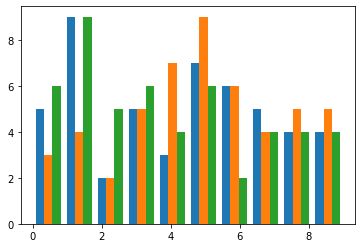

In [60]:
# Geração das notas
notas = np.random.randint(0,10,(50, 3))

# Vamos plotar o histograma das notas
import matplotlib.pyplot as plt
plt.hist(notas);

O histrograma nos forneceu uma visão interessante, mas queremos aprofundar o estudo e obter as notas maiores ou iguais a 7,00:

In [51]:
mascara_bool = notas >= 7
mascara_bool

array([[ True, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False],
       [ True, False,  True],
       [False, False, False],
       [ True, False,  True],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False,  True,  True],
       [False, False, False],
       [ True,  True, False],
       [False, False, False],
       [ True, False,  True],
       [False, False, False],
       [False, False, False],
       [ True,  True,  True],
       [False,  True, False],
       [False, False, False],
       [False, False, False],
       [False,  True, False],
       [False, False, False],
       [False,  True, False],
       [False, False,  True],
       [False, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [False,  True, False],
       [ T

As demais operações e Ufunc funcionam de forma similar:

| Operador | ufunc equivalente |
|:---------|:-------------------|
| == | np.equal |  
| != | np.not_equal |
| < | np.less |
| <= | np.less_equal |
| > | np.greater |
| >= | np.greater_equal |

Mas ainda está difícil de analisar os dados com a tabela acima. Na realidade, o que criamos foi um *mapa de booleanos*, sobre o qual podemos realizar algumas operações interessantes. Por exemplo, vamos contar quantos estudantes obtiveram notas iguais ou maiores do que a média 7,00 em cada turma:

In [52]:
np.sum(mascara_bool, axis=0)

array([12, 14, 11])

Podemos avançar e calcular o percentual de estudantes que passaram por média:

In [53]:
np.sum(mascara_bool/50, axis=0)

array([0.24, 0.28, 0.22])

Vamos testar agora se algum aluno conseguiu a nota máxima no curso:

In [43]:
np.any(notas == 10, axis=0)

array([False, False, False])

Agora, imagine que os dados foram digitados manualmente. Para verificar a consistência desses dados, precisamos saber se todas as notas encontram-se entre 0 e 10:

In [47]:
np.all(notas >= 0) & np.all(notas <= 10)

True

Sabemos o percentual de alunos que obtiveram notas acima de 7,0. Para saber quais foram essas notas, podemos aplicar realizar a seguinte consulta?

In [54]:
notas[mascara_bool]

array([7, 7, 9, 9, 7, 8, 7, 8, 8, 8, 7, 7, 9, 7, 7, 9, 8, 9, 7, 8, 7, 8,
       7, 7, 8, 9, 8, 9, 7, 9, 9, 9, 7, 8, 8, 7, 9])

Aplicando a função `mean` obteremos as médias das notas acima de 7,0 das 3 turmas:

In [55]:
np.mean(notas[mascara_bool])

7.891891891891892

Vamos agora utilizar o algoritmo QuickSort para ordenar as notas de cada turma. Existem duas formas de fazer isso:
   1. sem modificar o array original, por meio da função `sort(array)`;
   2. modificando o array original, utilizando o método `array.sort()`.
Além disso, para controlar se queremos ordenar as linhas ou colunas, utilizamos o argumento `axis`.   

In [70]:
# Não modifica o array original e ordena as colunas
notas_ordenadas = np.sort(notas,axis=0)
print('Notas Ordenadas:\n',notas_ordenadas)
print('\nNotas Originais:\n',notas)

Notas Ordenadas:
 [[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 2 1]
 [1 2 1]
 [1 3 1]
 [1 3 1]
 [1 3 1]
 [1 3 1]
 [1 3 1]
 [2 4 1]
 [2 4 2]
 [3 4 2]
 [3 4 2]
 [3 4 2]
 [3 4 2]
 [3 4 3]
 [4 5 3]
 [4 5 3]
 [4 5 3]
 [5 5 3]
 [5 5 3]
 [5 5 4]
 [5 5 4]
 [5 5 4]
 [5 5 4]
 [5 6 5]
 [6 6 5]
 [6 6 5]
 [6 6 5]
 [6 6 5]
 [6 6 5]
 [6 7 6]
 [7 7 6]
 [7 7 7]
 [7 7 7]
 [7 8 7]
 [7 8 7]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [8 9 8]
 [9 9 9]
 [9 9 9]
 [9 9 9]
 [9 9 9]]

Notas Originais:
 [[6 7 9]
 [4 5 0]
 [6 6 1]
 [3 5 0]
 [5 2 7]
 [5 9 3]
 [0 9 8]
 [7 6 9]
 [5 1 2]
 [5 0 4]
 [1 4 1]
 [9 6 1]
 [6 9 3]
 [8 8 5]
 [8 7 2]
 [1 0 7]
 [1 9 0]
 [6 4 3]
 [3 5 7]
 [1 0 4]
 [0 3 1]
 [9 3 8]
 [7 5 5]
 [7 5 0]
 [2 7 0]
 [6 5 1]
 [3 6 4]
 [1 5 3]
 [4 4 5]
 [1 6 2]
 [0 3 1]
 [2 7 4]
 [1 8 5]
 [0 1 1]
 [7 9 2]
 [5 4 1]
 [1 4 7]
 [0 8 6]
 [8 3 2]
 [8 1 0]
 [1 4 8]
 [4 3 3]
 [7 5 6]
 [9 5 5]
 [3 8 1]
 [9 1 3]
 [6 8 9]
 [5 4 9]
 [3 2 8]
 [5 6 5]]


In [71]:
# Modifica o array original e ordena as colunas
notas.sort(axis=0)
print('\nNotas Originais Ordenadas:\n',notas)


Notas Originais Ordenadas:
 [[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 2 1]
 [1 2 1]
 [1 3 1]
 [1 3 1]
 [1 3 1]
 [1 3 1]
 [1 3 1]
 [2 4 1]
 [2 4 2]
 [3 4 2]
 [3 4 2]
 [3 4 2]
 [3 4 2]
 [3 4 3]
 [4 5 3]
 [4 5 3]
 [4 5 3]
 [5 5 3]
 [5 5 3]
 [5 5 4]
 [5 5 4]
 [5 5 4]
 [5 5 4]
 [5 6 5]
 [6 6 5]
 [6 6 5]
 [6 6 5]
 [6 6 5]
 [6 6 5]
 [6 7 6]
 [7 7 6]
 [7 7 7]
 [7 7 7]
 [7 8 7]
 [7 8 7]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [8 9 8]
 [9 9 9]
 [9 9 9]
 [9 9 9]
 [9 9 9]]
